In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

# SOR
def sor(A, b, xn, w):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k < j:
                sum = sum + A[j, k]*xnp1[k]
            elif k > j:
                sum = sum + A[j, k]*xn[k]

        xnp1[j] = w*(b[j] - sum)/A[j, j] + (1-w)*xn[j]
    return xnp1

# Jacobi
def jacobi(A, b, xn):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k != j:
                sum = sum + A[j, k]*xn[k]
        xnp1[j] = (b[j] - sum)/A[j, j]
    return xnp1

# Gauss Seidel
def gsMethod(A, b, xn):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k < j:
                sum = sum + A[j, k]*xnp1[k]
            elif k > j:
                sum = sum + A[j, k]*xn[k]
        xnp1[j] = (b[j] - sum)/A[j, j]
    return xnp1


# SOR method
counter = 0
A = np.array([[2,4,-4],[3,3,3],[10,10,5]])
xn = np.array([0,0,0])
xn1 = xn
b = np.array([[1],[3],[5]])

for i in range(sys.maxsize):
    xn = jacobi(A, b, xn)
    counter += 1
    if(np.linalg.norm((xn1 - xn), np.inf) < 5*10**-6):
        break
    xn1 = xn
    
print(xn)
print(counter)

[-2.5  2.5  1. ]
4


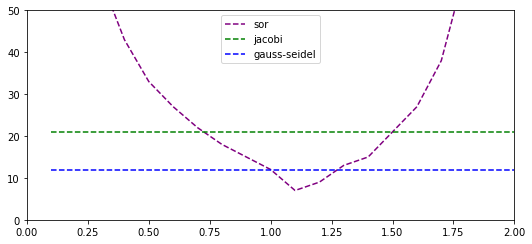

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

# SOR
def sor(A, b, xn, w):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k < j:
                sum = sum + A[j, k]*xnp1[k]
            elif k > j:
                sum = sum + A[j, k]*xn[k]

        xnp1[j] = w*(b[j] - sum)/A[j, j] + (1-w)*xn[j]
    return xnp1

# Jacobi
def jacobi(A, b, xn):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k != j:
                sum = sum + A[j, k]*xn[k]
        xnp1[j] = (b[j] - sum)/A[j, j]
    return xnp1

# Gauss Seidel
def gsMethod(A, b, xn):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k < j:
                sum = sum + A[j, k]*xnp1[k]
            elif k > j:
                sum = sum + A[j, k]*xn[k]
        xnp1[j] = (b[j] - sum)/A[j, j]
    return xnp1


# SOR method
def iterSOR(w):
    counter = 0
    A = np.array([[2,-1,0],[-1,4,2],[0,2,6]])
    xn = np.array([0,0,0])
    xn1 = xn
    b = np.array([[-1],[3],[5]])

    for i in range(10000):
        xn = sor(A, b, xn, w)
        counter += 1
        if(np.linalg.norm((xn1 - xn), np.inf) < 5*10**-6):
            break
        xn1 = xn
    return counter

def iterJ(w):
    counter = 0
    A = np.array([[2,-1,0],[-1,4,2],[0,2,6]])
    xn = np.array([0,0,0])
    xn1 = xn
    b = np.array([[-1],[3],[5]])

    for i in range(10000):
        xn = jacobi(A, b, xn)
        counter += 1
        if(np.linalg.norm((xn1 - xn), np.inf) < 5*10**-6):
            break
        xn1 = xn
    return counter

def iterGS(w):
    counter = 0
    A = np.array([[2,-1,0],[-1,4,2],[0,2,6]])
    xn = np.array([0,0,0])
    xn1 = xn
    b = np.array([[-1],[3],[5]])

    for i in range(10000):
        xn = gsMethod(A, b, xn)
        counter += 1
        if(np.linalg.norm((xn1 - xn), np.inf) < 5*10**-6):
            break
        xn1 = xn
    return counter

y1 = [] 
y2 = []
y3 = []

# create lists for y values (iterations)
for i in range(1, 21):
    y1.append(iterSOR(i/10))
    y2.append(iterJ(i/10))
    y3.append(iterGS(i/10))

# graph stuff
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#create x values
x1 = np.linspace(0.1, 2, 20)
x2 = x1
x3 = x1

# plot functions
plt.plot(x1, y1, '--', color = "purple", label = 'sor')
plt.plot(x2, y2, '--', color = "green",label = 'jacobi')
plt.plot(x3, y3, '--',  color = "blue",label = 'gauss-seidel')
plt.legend()

# constrain graph window 
plt.xlim([0, 2])
plt.ylim([0, 50])

# display graph
plt.show()

